# Black Friday Data Analysis Project 

## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_csv('BlackFriday.csv')
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


## Removing Null values/columns

In [3]:
df.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            166986
Product_Category_3            373299
Purchase                           0
dtype: int64

In [4]:
del df["Product_Category_2"]
del df["Product_Category_3"]

In [5]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


In [6]:
df["User_ID"].nunique()

5891

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     537577 non-null  int64 
 1   Product_ID                  537577 non-null  object
 2   Gender                      537577 non-null  object
 3   Age                         537577 non-null  object
 4   Occupation                  537577 non-null  int64 
 5   City_Category               537577 non-null  object
 6   Stay_In_Current_City_Years  537577 non-null  object
 7   Marital_Status              537577 non-null  int64 
 8   Product_Category_1          537577 non-null  int64 
 9   Purchase                    537577 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 41.0+ MB


## Pie chart for Gender Ratio 

<Axes: ylabel='Ratio'>

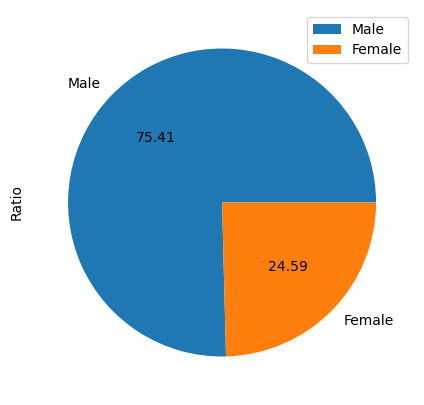

In [8]:
data= pd.DataFrame({'Ratio': [len(df[df['Gender']=='M']), len(df[df['Gender']=='F'])]}, index= ['Male','Female'])

data.plot.pie(y= 'Ratio',figsize=(5,5), autopct="%.2f")

<Axes: title={'center': ' Gender Ratio'}>

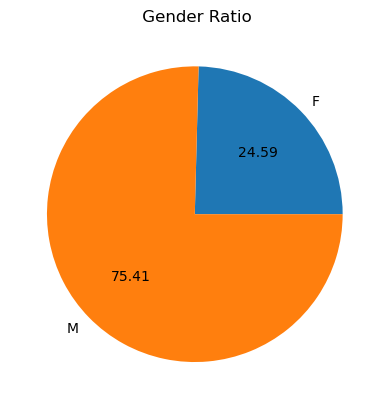

In [9]:
## Alternate approach to make pie chart

df.groupby("Gender").size().plot(kind = 'pie', autopct="%.2f", title =" Gender Ratio")

<Axes: title={'center': ' Gender Ratio'}, xlabel='Gender'>

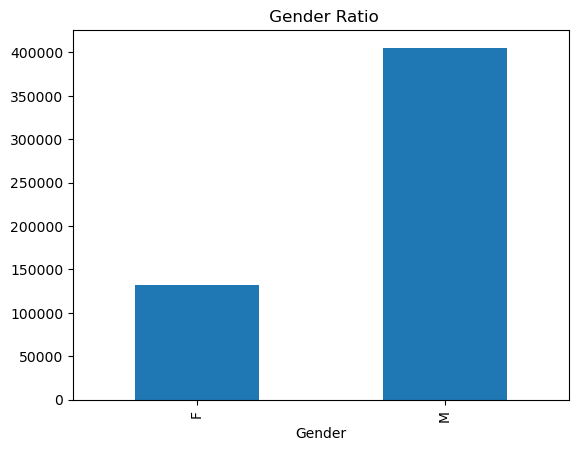

In [10]:
df.groupby("Gender").size().plot(kind = 'bar', title =" Gender Ratio")

<Axes: title={'center': 'Purchases via Gender'}, ylabel='Purchase'>

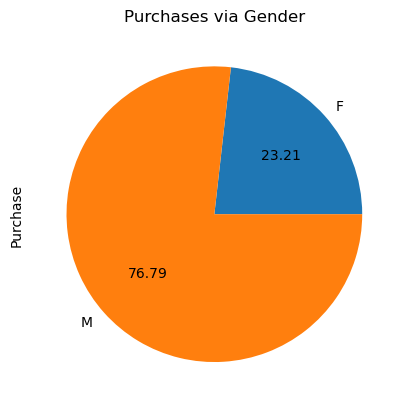

In [11]:
df.groupby("Gender").sum()['Purchase'].plot(kind= 'pie', autopct="%.2f", title= 'Purchases via Gender')

<Axes: ylabel='Purchase'>

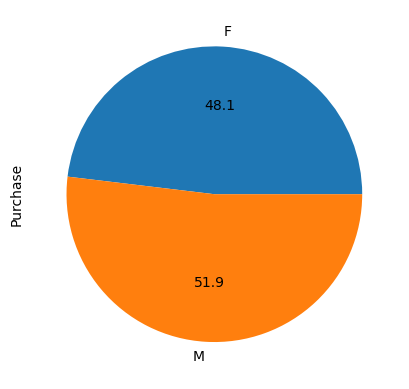

In [12]:
df.groupby("Gender").mean(numeric_only=True)['Purchase'].plot(kind= 'pie', autopct="%0.1f")

## Analysing Age and Maritial columns

<Axes: title={'center': 'Purchase distribution by age'}, xlabel='Age', ylabel=' No. of Products'>

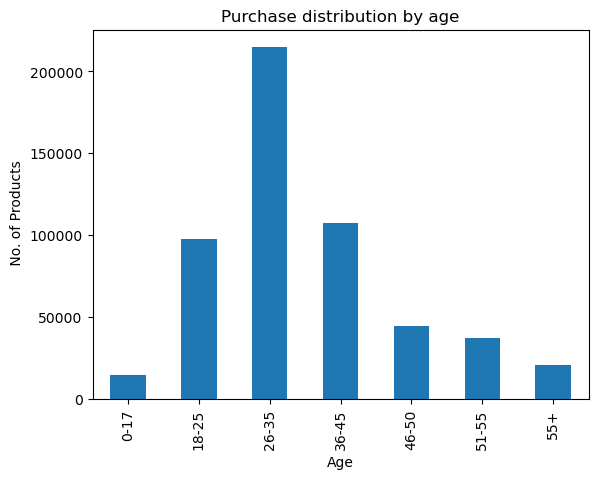

In [13]:
df.groupby("Age").size().plot(kind = 'bar', title="Purchase distribution by age", ylabel=" No. of Products")

<Axes: title={'center': 'No. of unique products purchase by different ages'}, xlabel='Age'>

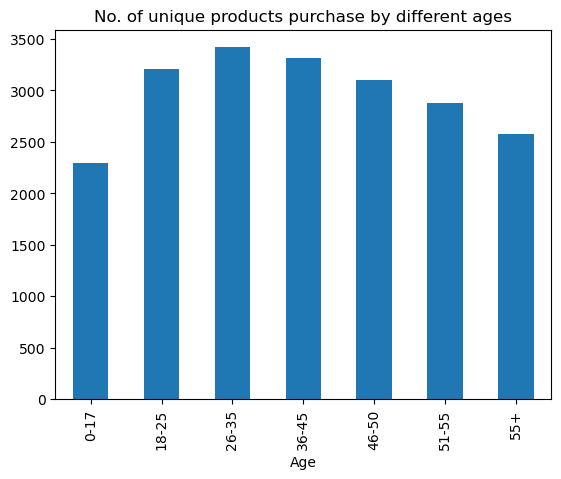

In [14]:
df.groupby("Age").nunique()['Product_ID'].plot(kind= 'bar', title="No. of unique products purchase by different ages")

<Axes: title={'center': 'Amount paid by different ages'}, xlabel='Age'>

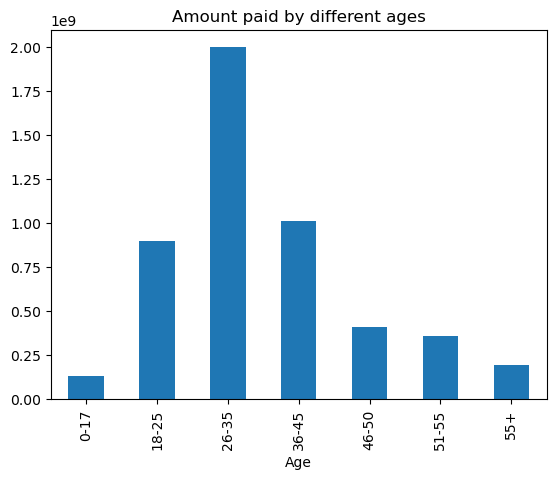

In [15]:
df.groupby("Age").sum()['Purchase'].plot(kind= 'bar', title="Amount paid by different ages")

<Axes: title={'center': 'Amount paid by different ages'}, ylabel='Purchase'>

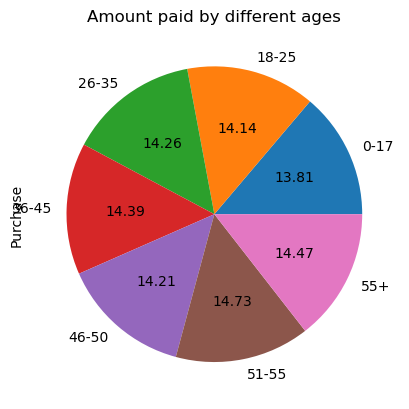

In [16]:
df.groupby("Age").mean(numeric_only=True)['Purchase'].plot(kind= 'pie', title="Amount paid by different ages", autopct="%.2f")

<Axes: title={'center': 'num of married people'}>

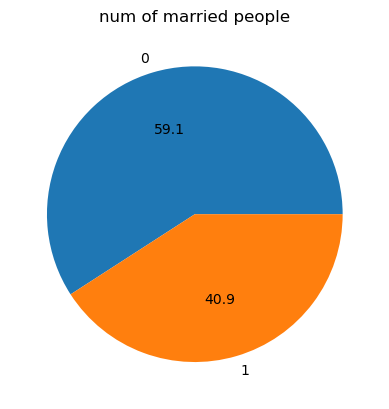

In [17]:
df.groupby("Marital_Status").size().plot(kind= 'pie', autopct="%0.1f", title= "num of married people")

## Multicolumn analysis

<Axes: xlabel='Age', ylabel='count'>

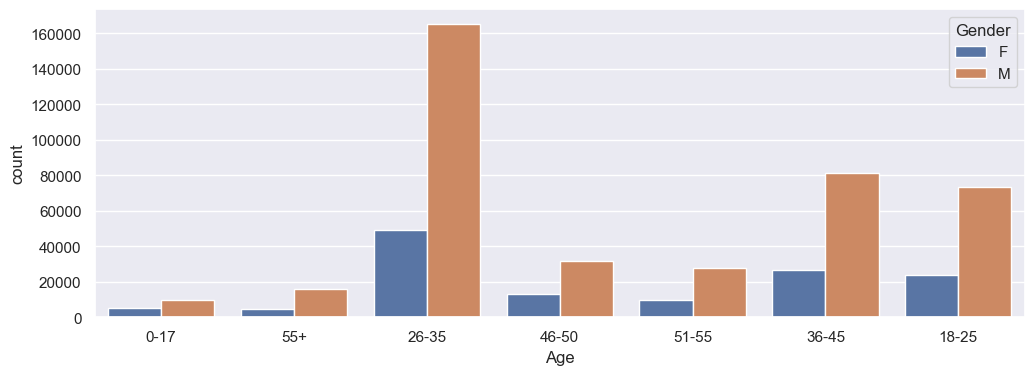

In [18]:
sns.set(rc = {'figure.figsize': (12,4)})
sns.countplot(x="Age", hue="Gender", data= df)

# Which gender of which age purchases more products 

<Axes: xlabel='Marital_Status', ylabel='count'>

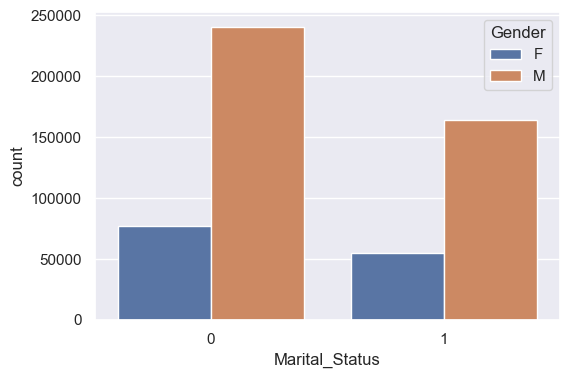

In [19]:
sns.set(rc = {'figure.figsize': (6,4)})
sns.countplot(x="Marital_Status", hue="Gender", data= df)

# which gender is more married 

<Axes: xlabel='City_Category', ylabel='count'>

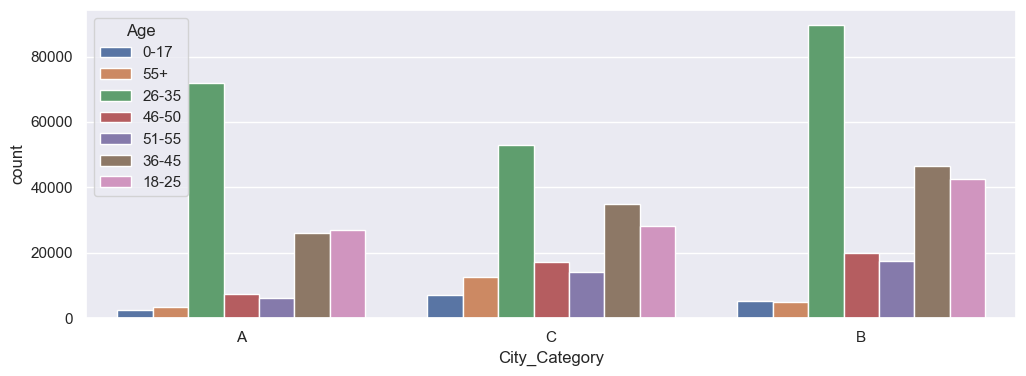

In [20]:
sns.set(rc = {'figure.figsize': (12,4)})
sns.countplot(x=df["City_Category"], hue= "Age", data = df)
# which city buys more products

<Axes: title={'center': 'which city buys more products'}>

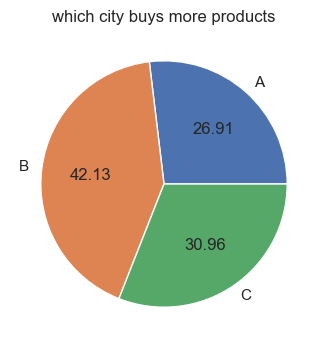

In [21]:
df.groupby("City_Category").size().plot(kind="pie", autopct="%0.2f", title="which city buys more products")

<Axes: xlabel='City_Category', ylabel='count'>

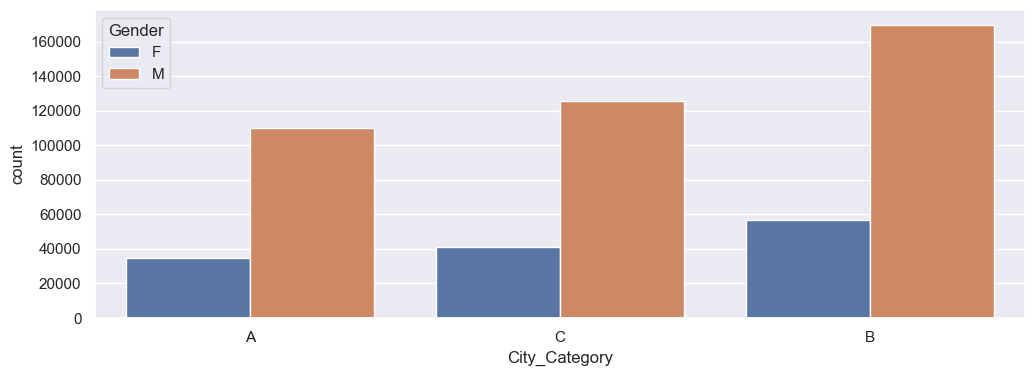

In [22]:
sns.countplot(x=df["City_Category"], hue= "Gender", data = df)

<Axes: title={'center': 'which city buys more products'}, ylabel='Purchase'>

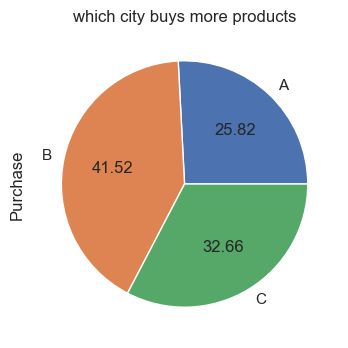

In [23]:
df.groupby("City_Category").sum()['Purchase'].plot(kind='pie', autopct="%.2f", title="which city buys more products")

<Axes: title={'center': 'which city buys expensive products'}, ylabel='Purchase'>

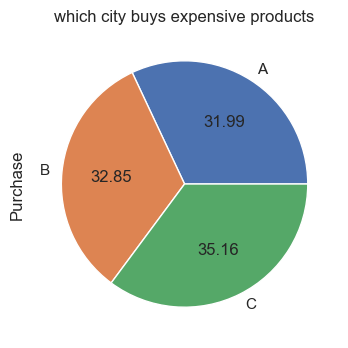

In [24]:
df.groupby("City_Category").mean(numeric_only=True)['Purchase'].plot(kind='pie', autopct="%.2f", title="which city buys expensive products")

# City A buys more expensive products than city B whereas city B buys more number of products than city A

## City analysis

<Axes: xlabel='Stay_In_Current_City_Years', ylabel='count'>

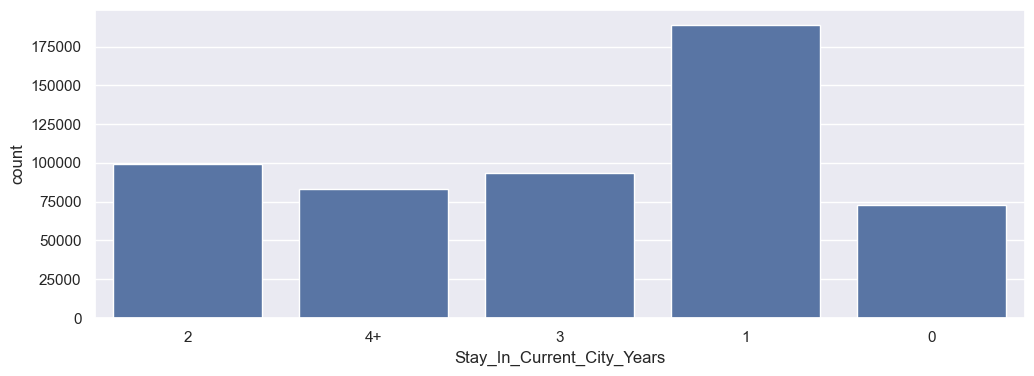

In [25]:
sns.countplot(x = df['Stay_In_Current_City_Years'])

<Axes: >

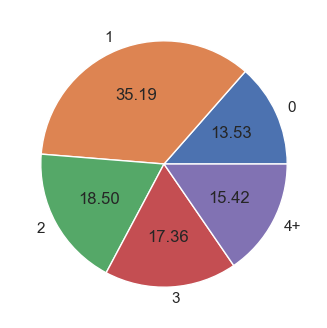

In [26]:
df.groupby('Stay_In_Current_City_Years').size().plot(kind = 'pie', autopct = "%.2f")

<Axes: xlabel='Stay_In_Current_City_Years', ylabel='count'>

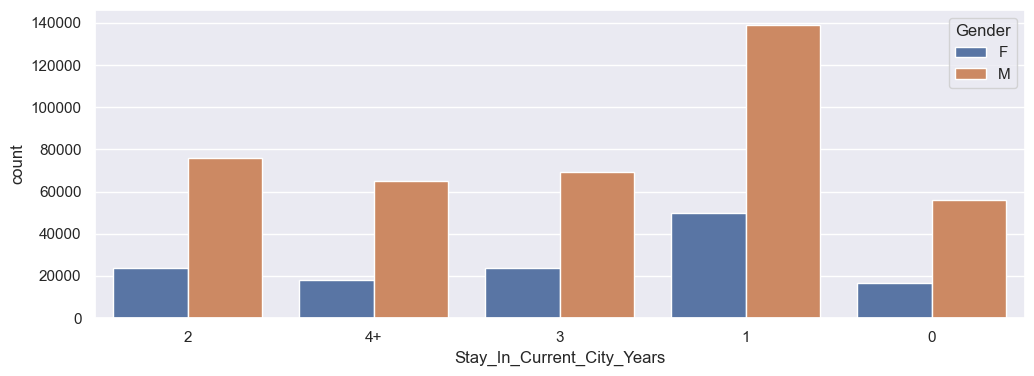

In [27]:
sns.countplot(x = 'Stay_In_Current_City_Years', hue = 'Gender', data = df)

<Axes: xlabel='Stay_In_Current_City_Years', ylabel='count'>

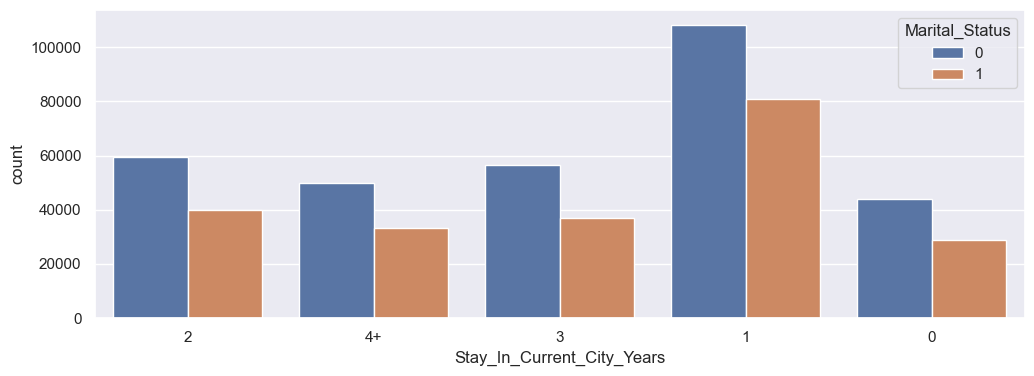

In [28]:
sns.countplot(x = 'Stay_In_Current_City_Years', hue = 'Marital_Status', data = df)

<Axes: xlabel='Stay_In_Current_City_Years', ylabel='count'>

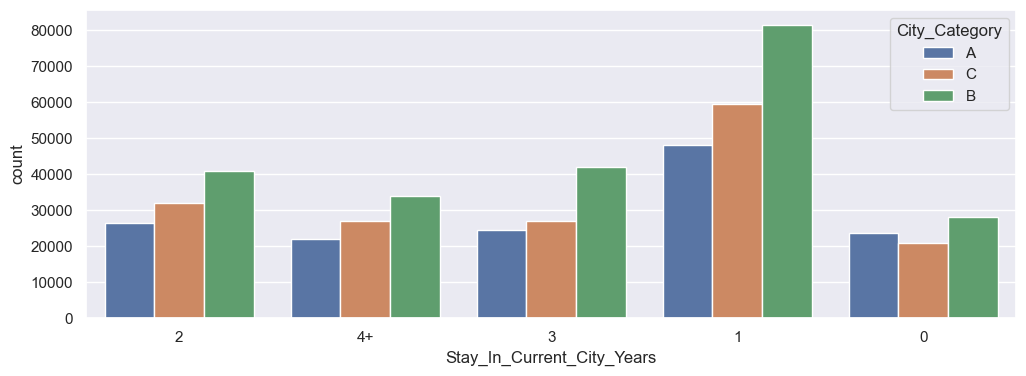

In [29]:
sns.countplot(x = 'Stay_In_Current_City_Years', hue = 'City_Category', data = df)

<Axes: xlabel='City_Category', ylabel='count'>

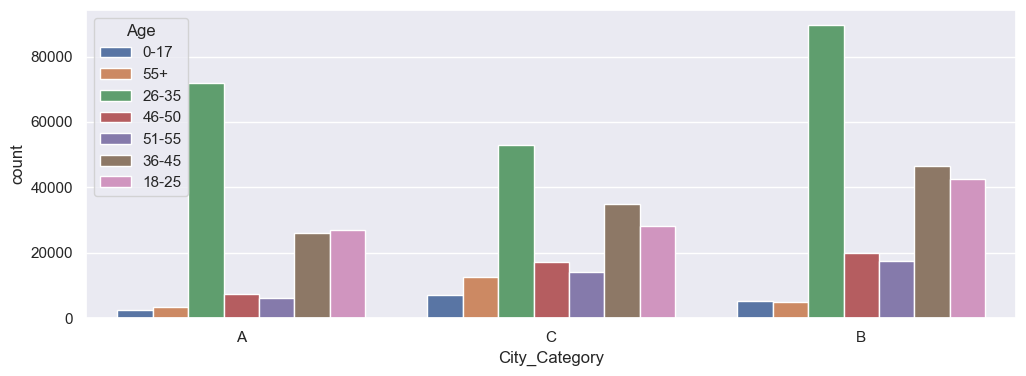

In [30]:
sns.countplot(x = 'City_Category', hue = 'Age',data = df)

<Axes: xlabel='Stay_In_Current_City_Years'>

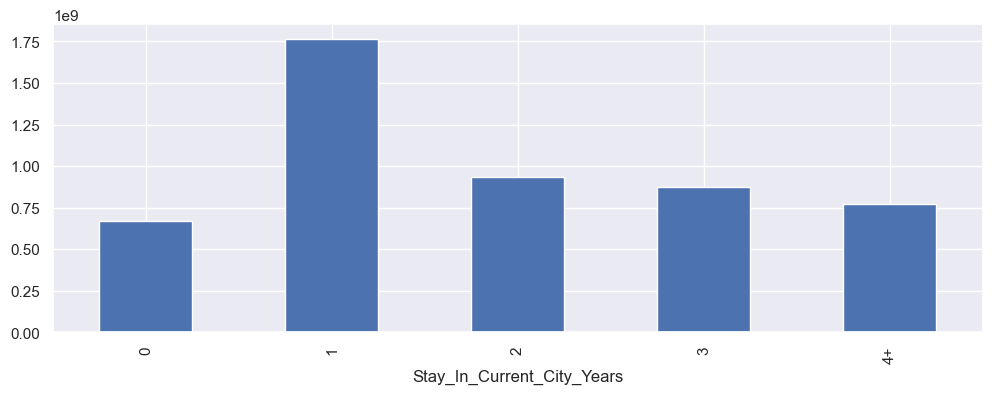

In [31]:
df.groupby('Stay_In_Current_City_Years').sum()['Purchase'].plot(kind = 'bar')

<Axes: xlabel='Stay_In_Current_City_Years'>

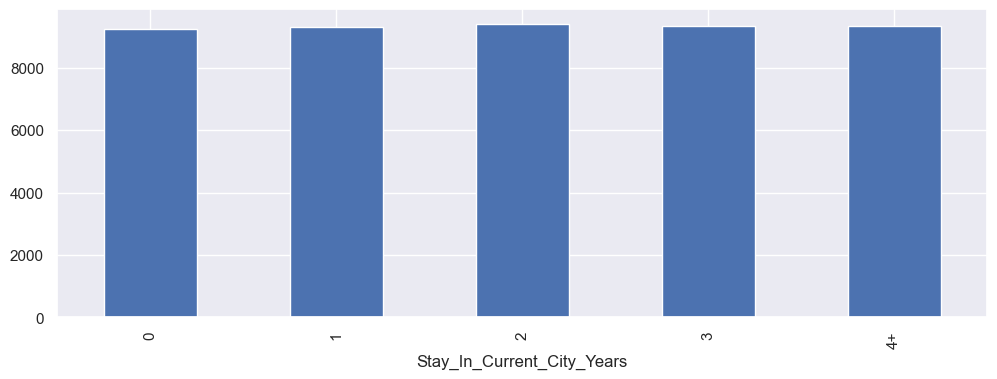

In [32]:
df.groupby('Stay_In_Current_City_Years').mean(numeric_only=True)['Purchase'].plot(kind = 'bar')

<Axes: xlabel='Occupation', ylabel='count'>

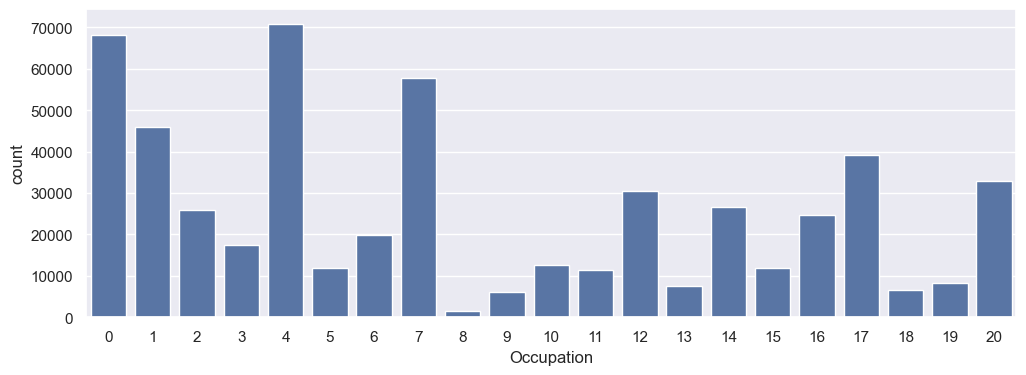

In [33]:
sns.countplot(x = df['Occupation'])

<Axes: xlabel='Occupation'>

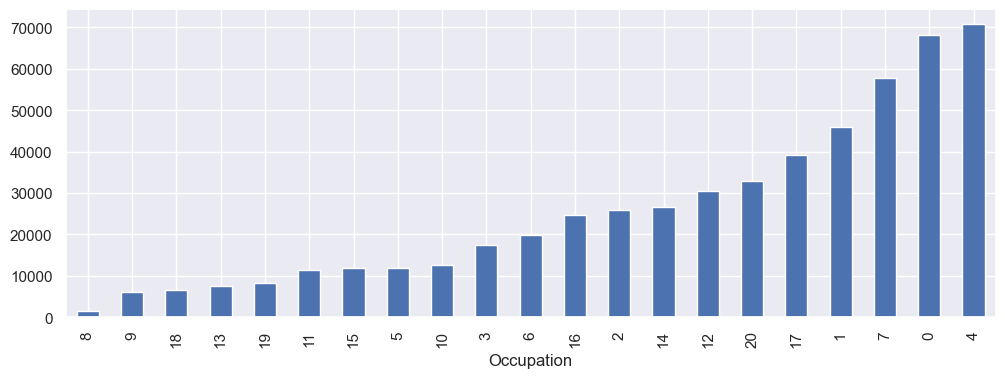

In [34]:
df.groupby('Occupation').size().sort_values().plot(kind = 'bar')

<Axes: xlabel='Occupation'>

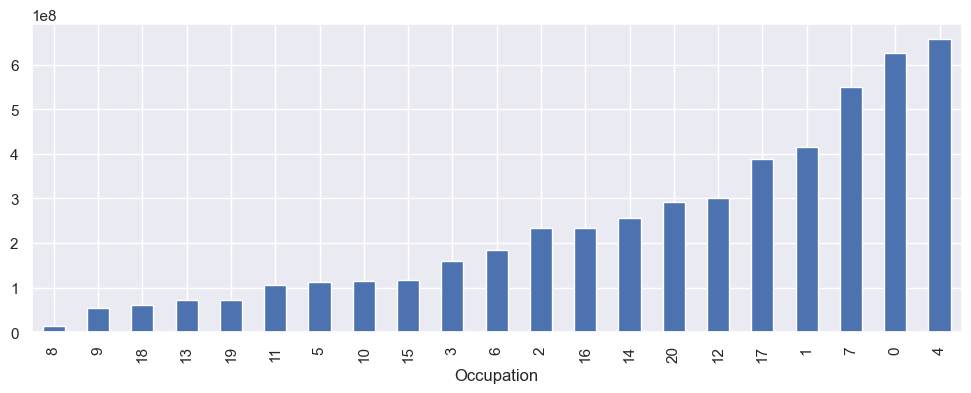

In [35]:
df.groupby('Occupation').sum()['Purchase'].sort_values().plot(kind = 'bar')

<Axes: xlabel='Occupation'>

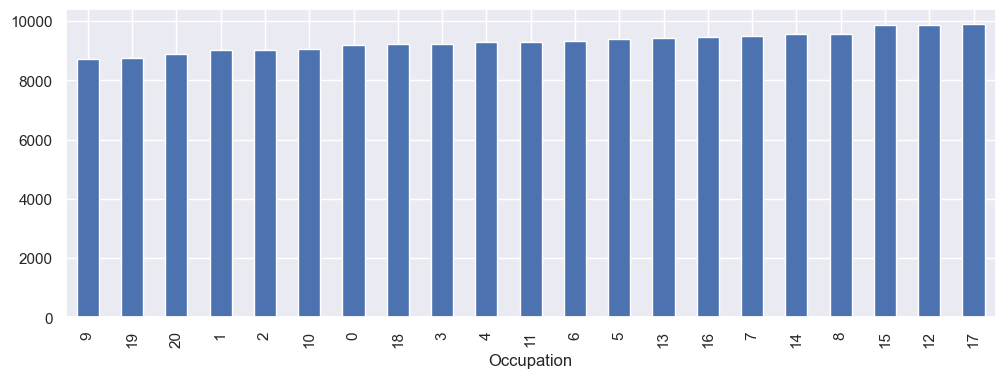

In [36]:
df.groupby('Occupation').mean(numeric_only=True)['Purchase'].sort_values().plot(kind = 'bar')

<Axes: xlabel='Occupation', ylabel='count'>

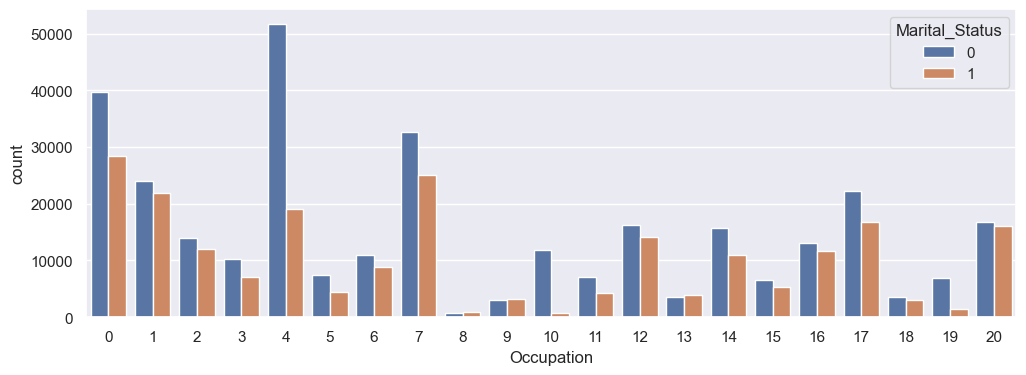

In [37]:
sns.countplot(x = 'Occupation', hue = 'Marital_Status', data = df)

<Axes: xlabel='Occupation', ylabel='count'>

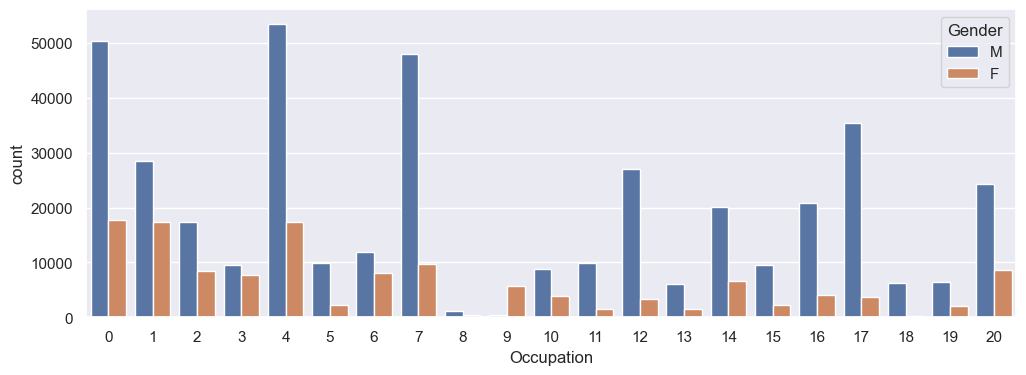

In [38]:
sns.countplot(x = 'Occupation', hue = 'Gender', data = df)

<Axes: xlabel='Occupation'>

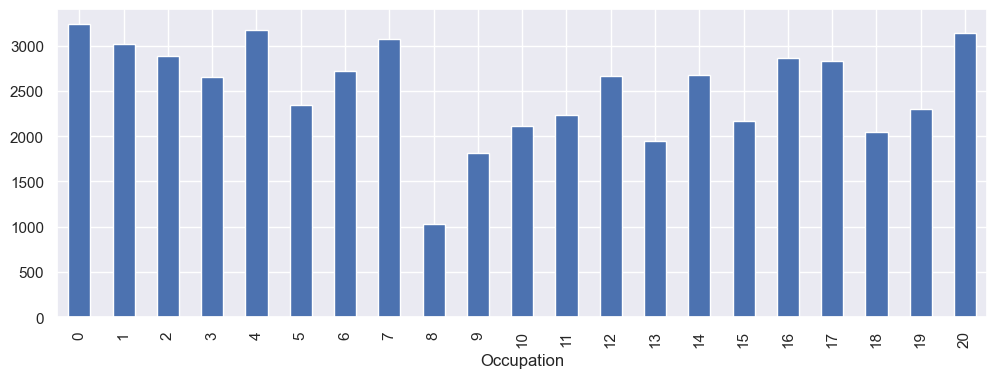

In [39]:
df.groupby('Occupation').nunique()['Product_ID'].plot(kind = 'bar')

<Axes: xlabel='Occupation'>

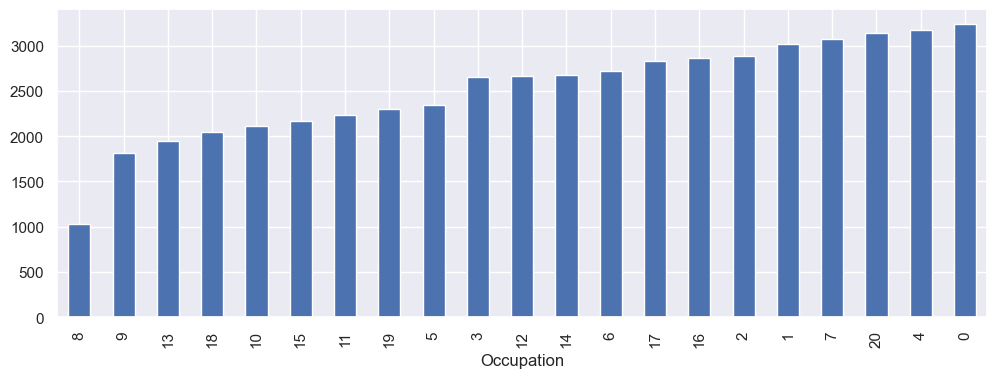

In [40]:
df.groupby('Occupation').nunique()['Product_ID'].sort_values().plot(kind = 'bar')

<Axes: xlabel='Product_Category_1'>

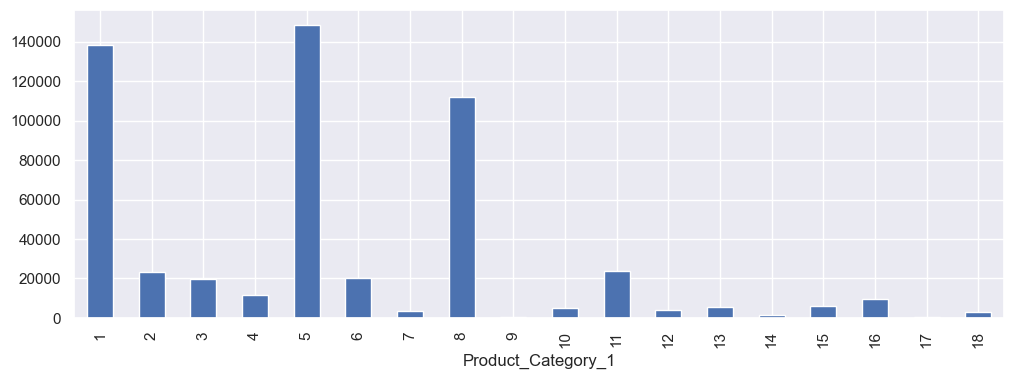

In [41]:
df.groupby('Product_Category_1').size().plot(kind = 'bar')

<Axes: xlabel='Product_Category_1'>

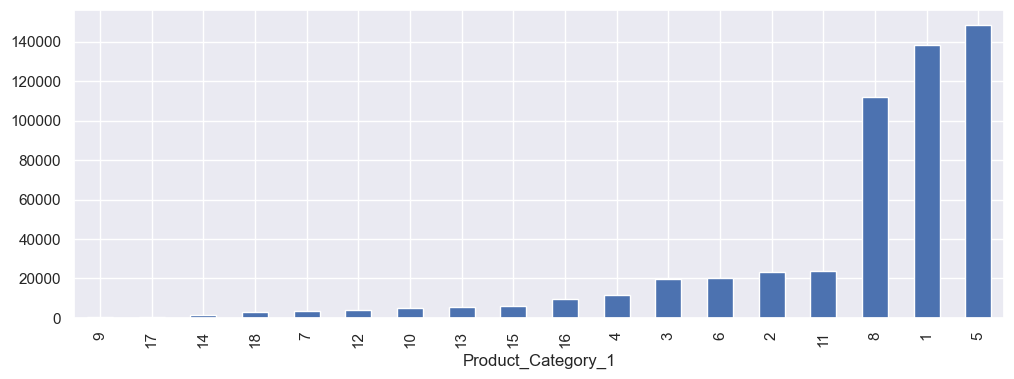

In [42]:
df.groupby('Product_Category_1').size().sort_values().plot(kind = 'bar')

<Axes: xlabel='Product_Category_1'>

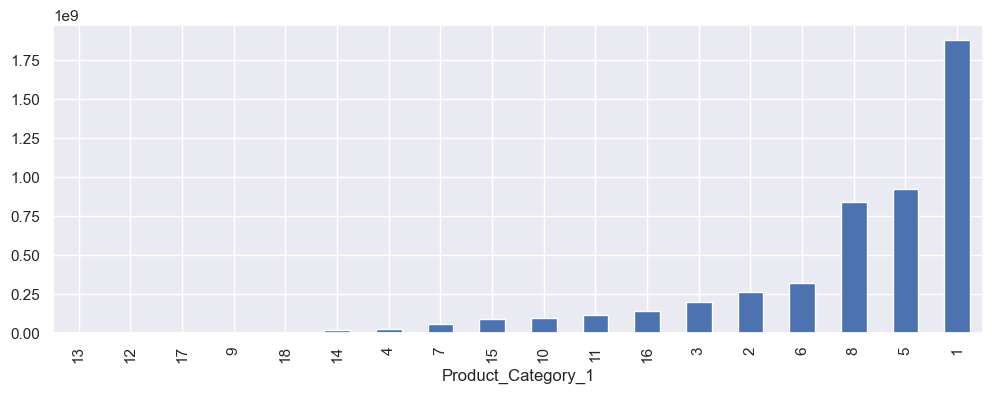

In [43]:
df.groupby('Product_Category_1').sum()['Purchase'].sort_values().plot(kind = 'bar')

<Axes: xlabel='Product_Category_1'>

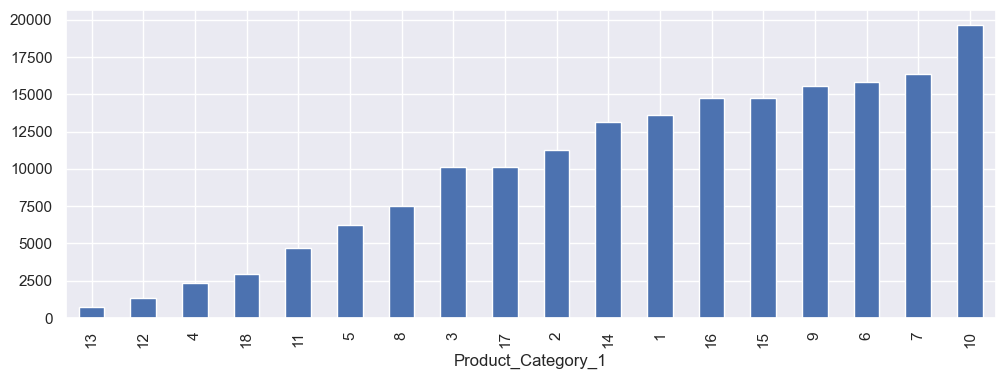

In [44]:
df.groupby('Product_Category_1').mean(numeric_only=True)['Purchase'].sort_values().plot(kind = 'bar')

<Axes: xlabel='Product_ID'>

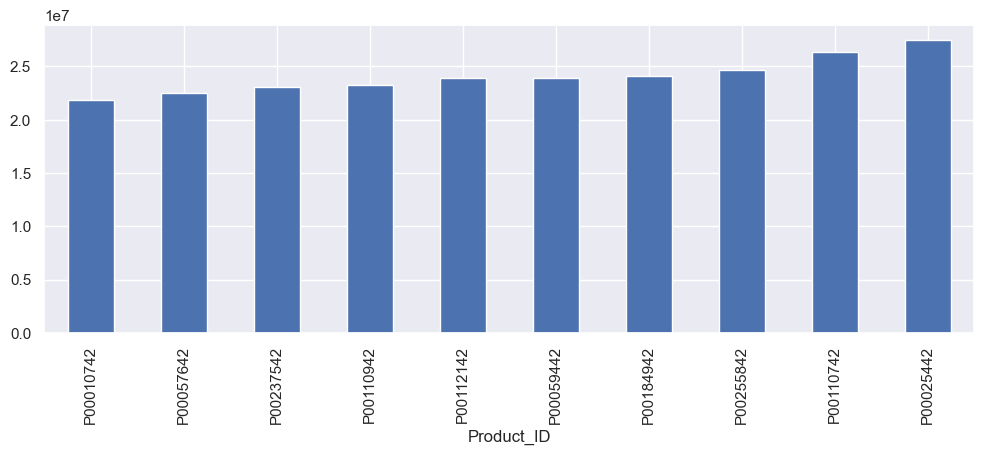

In [45]:
df.groupby('Product_ID').sum()['Purchase'].nlargest(10).sort_values().plot(kind = 'bar')

<Axes: xlabel='Product_ID'>

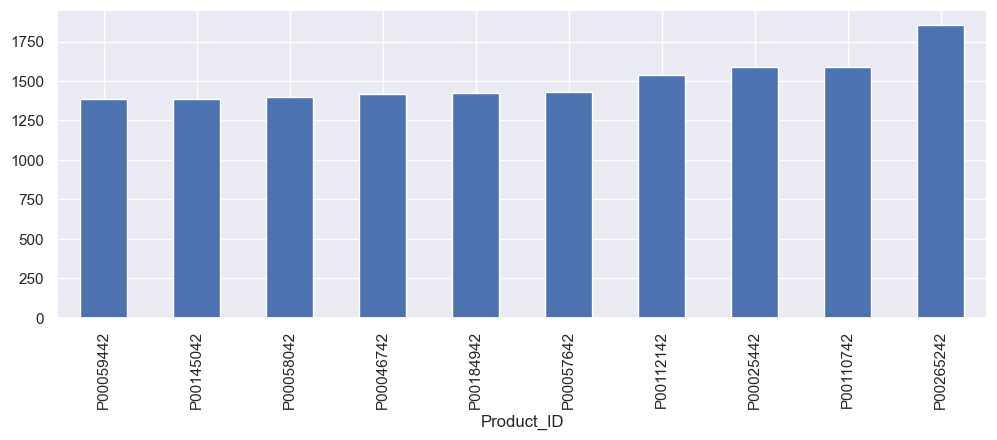

In [46]:
df.groupby('Product_ID').size().nlargest(10).sort_values().plot(kind = 'bar')

<Axes: xlabel='Product_ID'>

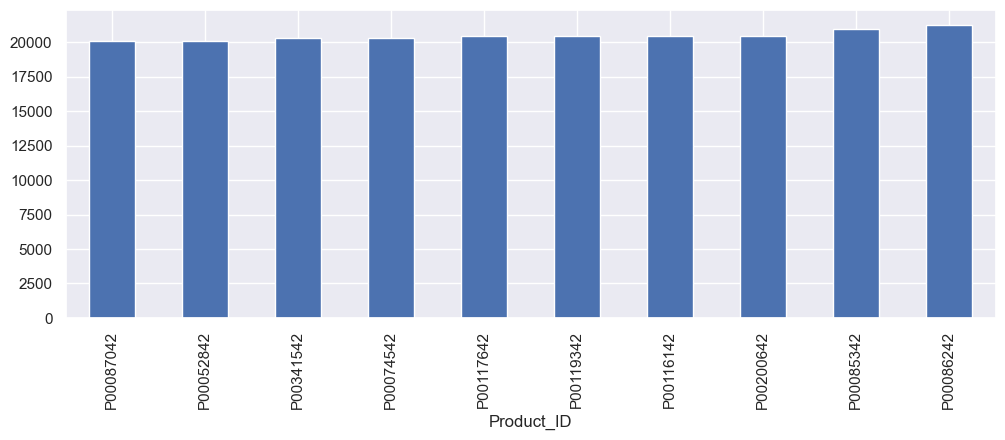

In [47]:
df.groupby('Product_ID').mean(numeric_only=True)['Purchase'].nlargest(10).sort_values().plot(kind = 'bar')

<Axes: xlabel='Product_Category_1', ylabel='count'>

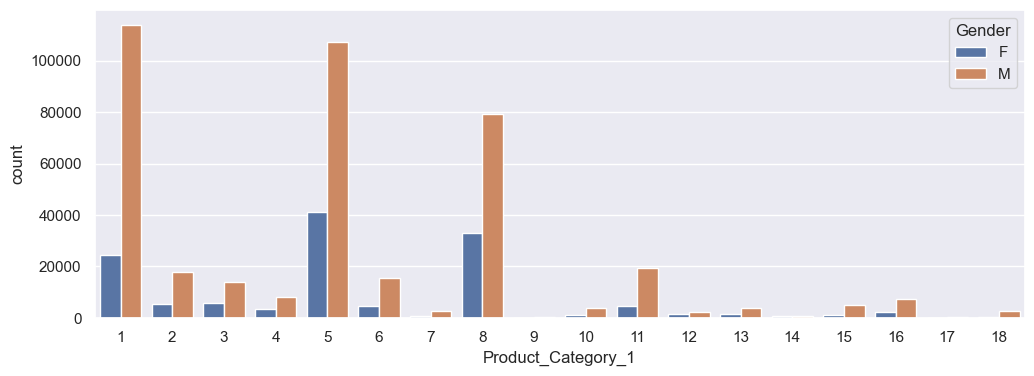

In [48]:
sns.countplot(x = 'Product_Category_1', hue = 'Gender', data = df)

<Axes: xlabel='Product_Category_1', ylabel='count'>

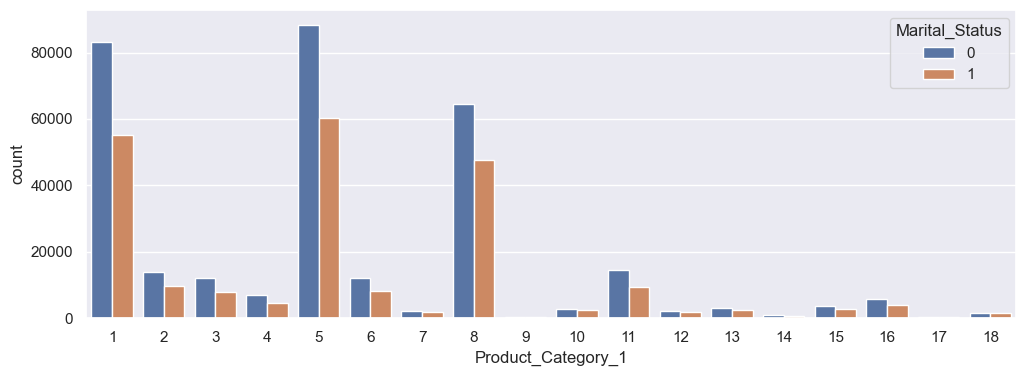

In [49]:
sns.countplot(x = 'Product_Category_1', hue = 'Marital_Status', data = df)

## combining age and maritial status

In [50]:
l = []
for i in range(len(df)):
    l.append(df['Gender'][i] +"_"+ str(df['Marital_Status'][i]))

df['MaritalGender'] = l
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Purchase,MaritalGender
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370,F_0
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200,F_0
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422,F_0
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057,F_0
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969,M_0


<Axes: xlabel='MaritalGender', ylabel='count'>

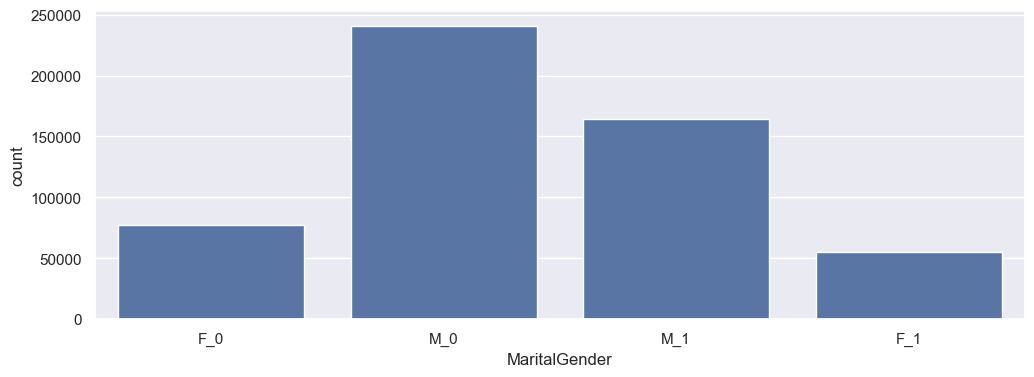

In [51]:
sns.countplot(x=df['MaritalGender'])

<Axes: xlabel='Age', ylabel='count'>

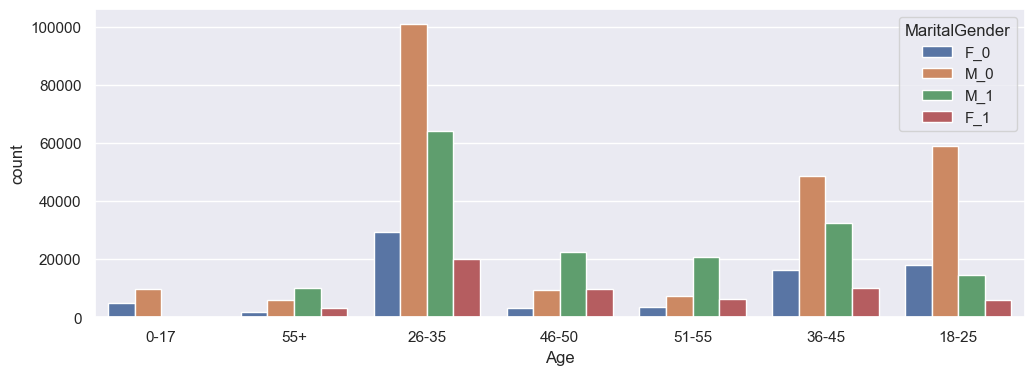

In [52]:
sns.countplot(x=df["Age"],hue=df['MaritalGender'])

<Axes: xlabel='Product_Category_1', ylabel='count'>

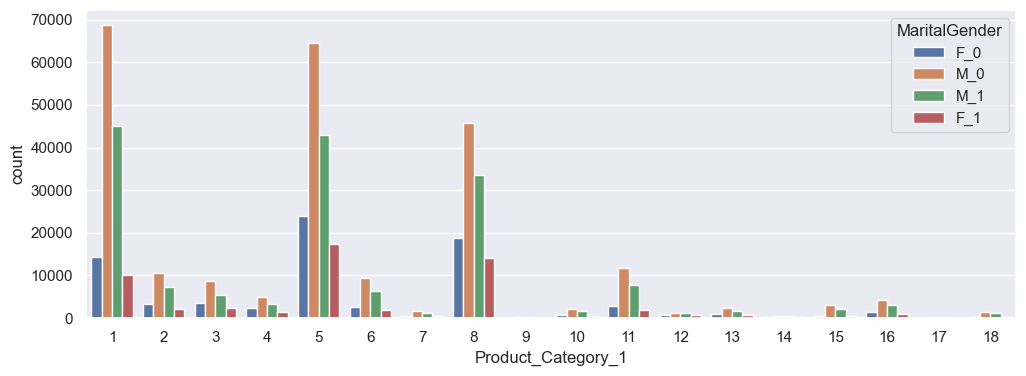

In [53]:
sns.countplot(x=df["Product_Category_1"],hue=df['MaritalGender'])

<Axes: xlabel='Stay_In_Current_City_Years', ylabel='count'>

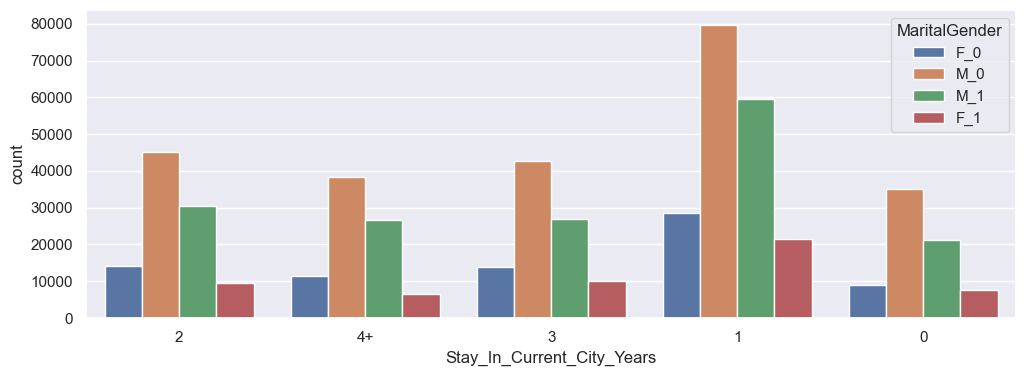

In [54]:
sns.countplot(x=df["Stay_In_Current_City_Years"],hue=df['MaritalGender'])